# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

## Import Libraries and Data

In [8]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from datasets import load_dataset
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list)	if isinstance(skill_list, str) else skill_list)

## Count Skills per Job Title

In [9]:
# Filter Data for the United States
df_US = df[df['job_country'] == 'United States']

# Filter Data for the Top 3 Job Titles
job_titles = df_US['job_title_short'].value_counts().head(3).index.to_list()

df_skills = df_US.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


## Plot Skill Counts

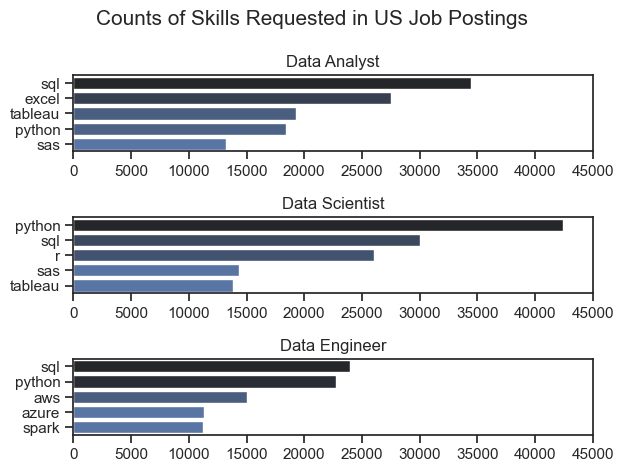

In [17]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 45000)

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout()
plt.show()

## Convert Counts to Percentages

In [10]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skill_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skill_perc['skill_percent'] = df_skill_perc['skill_count'] / df_skill_perc['jobs_total'] * 100
df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


## Plot Percentage Count

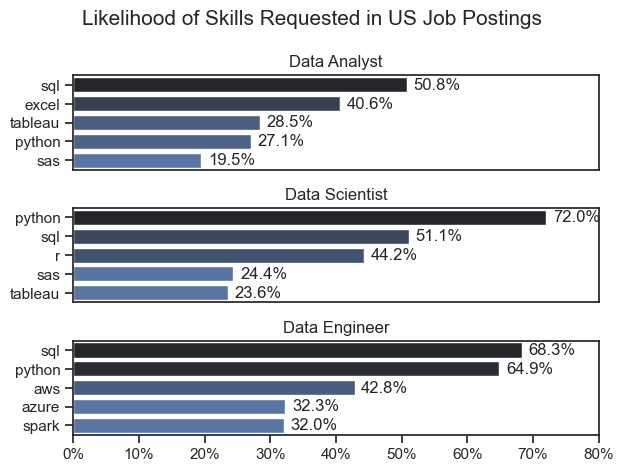

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
	df_plot = df_skill_perc[ df_skill_perc['job_title_short'] == job_title].head(5)
	sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
	ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
	ax[i].set_title(job_title)
	ax[i].set_ylabel('')
	ax[i].set_xlabel('')
	ax[i].legend().set_visible(False)
	ax[i].set_xlim(0, 80)

	if i != len(job_titles) - 1:
		ax[i].set_xticks([])

	for n, v in enumerate(df_plot['skill_percent']):
		ax[i].text(v + 1, n, f'{v:.1f}%', va='center')


fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout()
plt.show()


